<h1><strong>CSCI 4455/5455&ndash; Fall 2021</strong></h1>

<h2><strong>Assignment 1 - Know Your Data & Data Preprocessing</strong></h2>

<h3><strong><span style="color:#cc3300;">Due: October 06, 11:59pm </span></strong></h3>

<h3><strong>Your name:</strong></h3>

<ul>
	<li style="text-align: justify;">Please note that you must do this assignment&nbsp;<span style="color:#cc3300;"><strong><u>individually</u></strong></span>. Using automatic tools, your code will be checked against other submissions and other existing resources (such as websites and books).</li>
	<li style="text-align: justify;">Check Canvas regularly for possible clarifications and updates.</li>
</ul>

<h2>Similarity Measurement (50 points total)</h2>

<p style="text-align: justify;">In this part of the assignment, we are trying to get familiar with defining or selecting the right similarity measurement in data analysis. Let’s take a look at a two-dimensional data set below. The dataset has 40 points distributed between 0 to 2 on two axes of A1 and A2.</p>

In [57]:
# Do Not Edit This Cell
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
from IPython.core.display import HTML

warnings.filterwarnings('ignore')

def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [58]:
# Do Not Edit This Cell
dataset_path = r'dataset.csv'

We're loading the dataset and checking the first 10 rows.

In [59]:
# Do Not Edit This Cell
dataframe = pd.read_csv(dataset_path)
dataframe.head(10)

,point,A1,A2
0,x1,1.3,1.6
1,x2,1.6,0.9
2,x3,0.1,0.7
3,x4,1.7,1.8
4,x5,1.8,1.2
5,x6,0.3,1.1
6,x7,1.2,1.3
7,x8,0.1,0.7
8,x9,1.0,0.1
9,x10,0.8,0.2


Getting the summary statistics

In [60]:
# Do Not Edit This Cell
dataframe.describe()

,A1,A2
count,40.000000,40.000000
mean,0.945000,1.062500
std,0.615588,0.540981
min,0.100000,0.100000
25%,0.375000,0.675000
50%,0.900000,1.100000
75%,1.600000,1.500000
max,1.900000,1.900000


and checking the number of records

In [61]:
# Do Not Edit This Cell
len(dataframe)

40

<h2>Ranking Data in a Data Set</h2>
<p style="text-align: justify;">Consider a new point as an input argument to the functions below. Given the new data point, rank the data points in the dataset based on their similarity to the input point using the techniques you learned in the class.</p>

<h3>Euclidian Distance (10 points)</h3>
<p style="text-align: justify;">Complete the function below</p>
<ul>
    <li class="a"> <span> Parameters: </span>
<ul>
<li class="b"><span>a list of the existing points as tuples</span></li>
<li class="b"><span>input point as a list or tuple</span></li>
</ul>
<li class="a"><span>Returns a list containing the similarity based on Euclidean distance</span></li>
</ul>

In [6]:
def euclidean_distance(values, input_point):
    similarity = []
    for val in values:
        sqsum = 0
        for x,y in zip(input_point,val):
            sqsum += (x-y)**2
        similarity.append(np.sqrt(sqsum))
    return similarity

In [7]:
# Do Not Edit This Cell
list_of_points = list(zip(dataframe.A1, dataframe.A2)) # Get the list of existing points
test_point = (1.7, 0.9) # A test point to find the distances
euclidean_similarity = euclidean_distance(list_of_points, test_point) # Calling the euclidean_distance function
dataframe['Euclidean Distance'] = euclidean_similarity # Adding the results to the dataframe
dataframe.sort_values('Euclidean Distance', inplace=True) # Sorting the dataframe based on the Euclidean similarity
print(dataframe.head(10))

   point   A1   A2  Euclidean Distance
1     x2  1.6  0.9            0.100000
29   x30  1.6  0.9            0.100000
22   x23  1.9  1.1            0.282843
14   x15  1.7  0.6            0.300000
4     x5  1.8  1.2            0.316228
37   x38  1.9  0.6            0.360555
27   x28  1.6  0.5            0.412311
20   x21  1.3  1.1            0.447214
13   x14  1.2  1.2            0.583095
6     x7  1.2  1.3            0.640312


<h3>Manhattan Distance (10 points)</h3>
<p style="text-align: justify;">Complete the function below</p>
<ul>
    <li class="a"> <span> Parameters: </span>
<ul>
<li class="b"><span>a list of the existing points as tuples</span></li>
<li class="b"><span>input point as a list or tuple</span></li>
</ul>
<li class="a"><span>Returns a list containing the similarity based on Manhattan distance</span></li>
</ul>

In [8]:
def manhattan_distance(values, input_point):
    similarity = []
            
    for val in values:
        abssum = 0
        for x,y in zip(input_point,val):
            abssum += abs(x-y)
        similarity.append(abssum)

    return similarity

In [9]:
# Do Not Edit This Cell
manhattan_similarity = manhattan_distance(list_of_points, test_point) # Calling the manhattan_distance function
dataframe['Manhattan Distance'] = manhattan_similarity # Adding the results to the dataframe
dataframe.sort_values('Manhattan Distance', inplace=True) # Sorting the dataframe based on the Manhattan similarity
print(dataframe.head(10))

   point   A1   A2  Euclidean Distance  Manhattan Distance
29   x30  1.6  0.9            0.100000                 0.1
12   x13  0.4  1.3            1.360147                 0.1
0     x1  1.3  1.6            0.806226                 0.3
4     x5  1.8  1.2            0.316228                 0.4
18   x19  0.6  0.8            1.104536                 0.4
31   x32  0.4  1.1            1.315295                 0.5
35   x36  0.1  1.3            1.649242                 0.5
8     x9  1.0  0.1            1.063015                 0.6
10   x11  1.0  1.0            0.707107                 0.8
15   x16  1.6  0.1            0.806226                 0.8


<h3>Supremum Distance (10 points)</h3>
<p style="text-align: justify;">Complete the function below</p>
<ul>
    <li class="a"> <span> Parameters: </span>
<ul>
<li class="b"><span>a list of the existing points as tuples</span></li>
<li class="b"><span>input point as a list or tuple</span></li>
</ul>
<li class="a"><span>Returns a list containing the similarity based on Supremum distance</span></li>
</ul>

In [10]:
def supremum_distance(values, input_point):
    similarity = []
            
    for val in values:
        absdif = []
        for x,y in zip(input_point,val):
            absdif.append(abs(x-y))
        similarity.append(np.max(absdif))

    return similarity

In [11]:
# Do Not Edit This Cell
supremum_similarity = supremum_distance(list_of_points, test_point) # Calling the supremum_distance function
dataframe['Supremum Distance'] = supremum_similarity # Adding the results to the dataframe
dataframe.sort_values('Supremum Distance', inplace=True) # Sorting the dataframe based on the Supremum similarity
print(dataframe.head(10))

   point   A1   A2  Euclidean Distance  Manhattan Distance  Supremum Distance
12   x13  0.4  1.3            1.360147                 0.1                0.1
20   x21  1.3  1.1            0.447214                 1.8                0.1
21   x22  0.2  1.3            1.552417                 1.5                0.2
18   x19  0.6  0.8            1.104536                 0.4                0.3
26   x27  0.1  1.1            1.612452                 2.1                0.3
27   x28  1.6  0.5            0.412311                 0.9                0.3
7     x8  0.1  0.7            1.612452                 1.4                0.4
19   x20  1.7  0.1            0.800000                 1.7                0.4
35   x36  0.1  1.3            1.649242                 0.5                0.5
14   x15  1.7  0.6            0.300000                 0.9                0.5


<h3>Normalization (10 points)</h3>
Normalize the data set such that the normalized value of each data point is less than 1. Try using the Euclidean distance function on the new transformed data to rank the data points.
<p style="text-align: justify;">Complete the function below</p>
<ul>
    <li class="a"> <span> Parameters: </span>
<ul>
<li class="b"><span>a dataframe that has two columns named "A1" and "A2"</span></li>
</ul>
<li class="a"><span>Returns a new dataframe with normalized columns "A1" and "A2" such that the normalized value of each data point is less than 1</span></li>
</ul>

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
def normalize_df(input_df):
    normalize_df = input_df.copy(deep=True)
    
    eps = 0.0001
    
    for col in ["A1","A2"]:
        minval = normalize_df[col].min()
        maxval = normalize_df[col].max() + eps ## To handle the case of max value, max value should be little less than 1
        normalize_df[col] = (normalize_df[col] - minval)/(maxval - minval)

    return normalize_df

In [14]:
# Do Not Edit This Cell
normalized_df = normalize_df(dataframe) # Calling the normalize_df function to normalize the dataframe
norm_list_of_points = list(zip(normalized_df.A1, normalized_df.A2)) # Get the list of existing points
norm_test_point = (0.8838, 0.4679) # A normalized test point to find the distances
euclidean_similarity = euclidean_distance(norm_list_of_points, norm_test_point) # Calling the euclidean_distance function
normalized_df['Norm Euclidean Distance'] = euclidean_similarity # Adding the results to the dataframe
normalized_df.sort_values('Norm Euclidean Distance', inplace=True) # Sorting the dataframe based on the Euclidean similarity
normalized_df.drop(['Manhattan Distance', 'Supremum Distance'], axis=1, inplace=True) # Removing Manhattan and Supremum columns to compare the Euclidean columns
print(normalized_df.head(10))

   point        A1        A2  Euclidean Distance  Norm Euclidean Distance
29   x30  0.833287  0.444420            0.100000                 0.055704
1     x2  0.833287  0.444420            0.100000                 0.055704
22   x23  0.999944  0.555525            0.282843                 0.145491
4     x5  0.944392  0.611077            0.316228                 0.155471
14   x15  0.888840  0.277762            0.300000                 0.190204
37   x38  0.999944  0.277762            0.360555                 0.222805
20   x21  0.666630  0.555525            0.447214                 0.234182
27   x28  0.833287  0.222210            0.412311                 0.250829
13   x14  0.611077  0.611077            0.583095                 0.308022
6     x7  0.611077  0.666630            0.640312                 0.337448


<h3>Analysis (10 points)</h3>
<p style="text-align: justify;">Based on the above analyses, explain the difference between similarity methods.</p>

<p><strong>Your answer:</strong></p>


The 3 similarity measures serves different purposes

1) Euclidean Distance : Useful when we need the shortest possible path. Useful in calculating distance between 2 vectors.

2) Manhattan Distance : Useful in navigation applications, when the distance is not diagonal, rather it is like city blocks. Manhattan distance is also called city block distance as well.

3) Supremum Distance : Also called chebyshev distance, it is used in warehouse logistics.

<h2>Data Preprocessing (50 points total)</h2>
<p style="text-align: justify;">In this part of the assignment, we are trying to get familiar with different functions that can be used in preprocessing data. Suppose CU Denver Anschutz tested body fat and age of 120 randomly selected volunteers.</p>

In [15]:
# Do Not Edit This Cell
dataset_path = r'dataset2.csv'

In [16]:
# Do Not Edit This Cell
dataframe2 = pd.read_csv(dataset_path)
dataframe2.head(20)

,Age,Fat
0,21,32.3
1,21,36.6
2,22,11.9
3,22,12.9
4,24,37.3
5,24,31.9
6,24,30.7
7,25,12.5
8,26,31.0
9,26,26.2


<h3>Statistical Function (10 points)</h3>
<p style="text-align: justify;">Complete the function below. It will take a list of float numbers and returns the statistics of the records in the list.</p>
<ul>
<li class="a"><span>Parameters</span>:
<ul>
<li class="b"><span>a list of float numbers</span></li>
</ul>
</li>
<li class="a"><span>Returns a tuple of <em>mean</em>, <em>median</em>, and <em>standard deviation</em> of the input list</span>.</li>
</ul>
<p class="note">Note: Please write the mean, median, and standard deviation from scratch! You're allowed to use the math library only :)</p>

In [17]:
def statistical_report(values):
    mean_out = 0.0 # Initializing the mean variable
    median_out = 0.0 # Initializing the median variable
    std_out = 0.0 # Initializing the standard deviation variable
    # Write your code here
    
    n = len(values)
    
    # Calculating the mean
    for val in values:
        mean_out += val
    mean_out = mean_out/n
    
    # Calculating the median
    
    values.sort_values()
    if n % 2 == 0:
        median1 = values[n//2]
        median2 = values[n//2 - 1]
        median_out = (median1 + median2)/2
    else:
        median_out = values[n//2]

    # Calculating the standard deviation
    
    var = 0
    for val in values:
        var += (val - mean_out)**2
    var = var/n
    std_out = math.sqrt(var)
    

    return mean_out, median_out, std_out

In [18]:
# Do Not Edit This Cell
col_statistics = []
for column in dataframe2:
    col_mean, col_median, col_std = statistical_report(dataframe2[column])
    col_statistics.append((column, col_mean, col_median, col_std))
    print("{}:\tmean: {:.2f}\tmedian: {:.2f}\tstandard deviation: {:.2f}".format(column, col_mean, col_median, col_std))

Age:	mean: 44.44	median: 45.50	standard deviation: 12.48
Fat:	mean: 24.33	median: 12.35	standard deviation: 11.26


<h3>Scatter Function (5 points)</h3>
<p style="text-align: justify;">Complete the function below. It will take a Pandas DataFrame and draws a scatter plot based on the first two column values.</p>
<ul>
    <li class="a"><span>Parameters</span>:
<ul>
<li class="b"><span>a Pandas DataFrame consisting of at least two columns</span></li>
</ul>
</li>
<li class="a"><span>It will draw a <em>scatter plot</em> of the first two columns of the input DataFrame.</span></li>
</ul>
<p class="note">Note: Make sure the plot has title and axes names.</p>

In [71]:
import matplotlib.pyplot as plt
def scatter_plot(input_df):
    # Write your code here
     # Write your code here
    df = pd.DataFrame(input_df.iloc[:,:2])

    df.plot(x = 0, y = 1,kind = "scatter",figsize=(15,  10))
    plt.title('Age vs Fat')

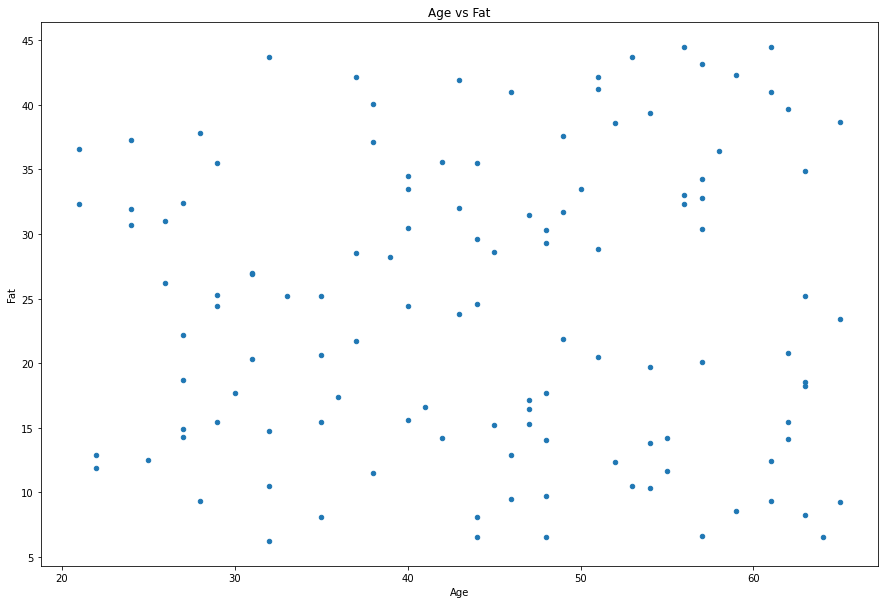

In [72]:
# Do Not Edit This Cell
scatter_plot(dataframe2)

<h3>Boxplot Function (5 points)</h3>
<p style="text-align: justify;">Complete the function below. It will take a Pandas DataFrame and draws a boxplot of each column separately.</p>
<ul>
<li class="a"><span>Parameters</span>:
<ul>
<li class="b"><span>a Pandas DataFrame </span></li>
</ul>
</li>
<li class="a"><span>It will draw a boxplot of each column of the input DataFrame.</span></li>
</ul>
<p class="note">Note: Make sure each plot has title.</p>

In [69]:
def boxplot_function(input_df):
    # Write your code here
    input_df.plot(kind = "box",  figsize=(15,  10))
    plt.title('Box plot')

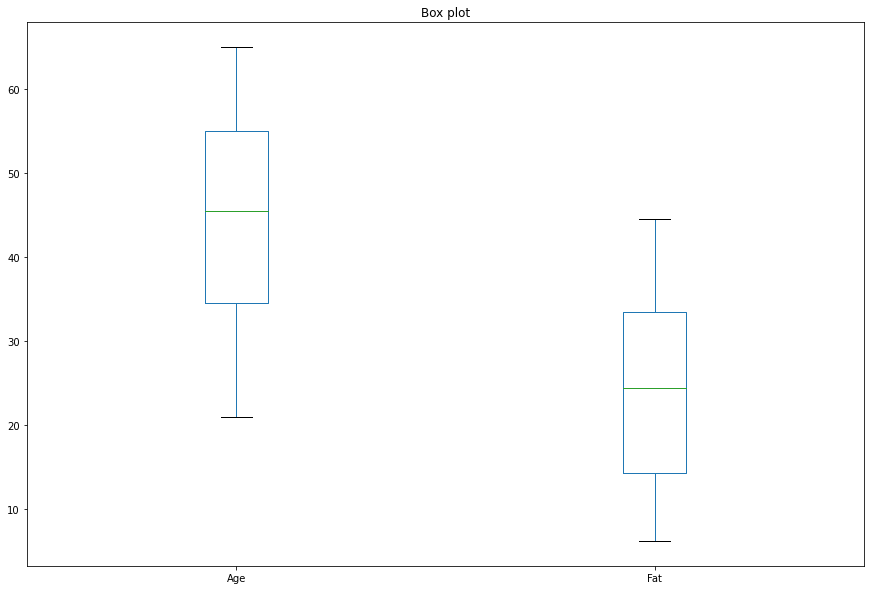

In [70]:
# Do Not Edit This Cell
boxplot_function(dataframe2)

<h3>Z-score Normalization (5 points)</h3>
<p style="text-align: justify;">Complete the function below. It will take a Pandas DataFrame and normalizes each column based on Z-score normalization.</p>
<ul>
<li class="a"><span>Parameters</span>:
<ul>
<li class="b"><span>a Pandas DataFrame </span></li>
</ul>
</li>
<li class="a"><span>a DataFrame with normalized columns.</span></li>
</ul>

In [23]:
def z_score_normalize(input_df):
    output_df = input_df.copy(deep=True)
    
    for col in input_df.columns:
        output_df[col] = (output_df[col] - output_df[col].mean())/output_df[col].std()
    
    return output_df

In [24]:
# Do Not Edit This Cell
z_normalized_df = z_score_normalize(dataframe2)
print(z_normalized_df)

          Age       Fat
0   -1.870319  0.704930
1   -1.870319  1.085217
2   -1.790533 -1.099220
3   -1.790533 -1.010781
4   -1.630960  1.147124
..        ...       ...
115  1.480697 -0.515524
116  1.560483 -1.576789
117  1.640269 -0.082174
118  1.640269  1.270938
119  1.640269 -1.338004

[120 rows x 2 columns]


In [56]:
z_normalized_df

,Age,Fat
0,-1.870319,0.704930
1,-1.870319,1.085217
2,-1.790533,-1.099220
3,-1.790533,-1.010781
4,-1.630960,1.147124
...,...,...
115,1.480697,-0.515524
116,1.560483,-1.576789
117,1.640269,-0.082174
118,1.640269,1.270938


<h3> Partitioning (25 points)</h3>
<p style="text-align: justify;">Complete the function below. It will take a a list of values and a partitioning method and applies the method on the list. It will return a list of list.</p>
<ul>
<li class="a"><span>Parameters</span>:
<ul>
<li class="b"><span>a list of values </span></li>
<li class="b"><span>a partitioning method: equal-frequency ('ef') or equal-width ('ew') </span></li>
<li class="b"><span>number of values in each bin for equal-frequency method </span></li>
<li class="b"><span>number of bins for equal-width method</span></li>
</ul>
</li>
<li class="a"><span>a partitioned list of list.</span></li>
</ul>

In [25]:
import math

In [54]:
def partitioning(input_list, method='ef', bin_frequency=5, bin_count=5):
    input_list.sort()
    output_list = []
    # Equal-frequency partitioning 
    if method == 'ef':
        # Write your code here
        length = len(input_list)
        elem_per_bin = int( bin_frequency)
        y= int(length/bin_frequency)
        for i in range(0,y):
            cur_bin_elem = []
            for j in range(i * elem_per_bin, (i + 1) * elem_per_bin):
                if j >= length:
                    break
                cur_bin_elem = cur_bin_elem + [input_list[j]]
            output_list.append(cur_bin_elem)
            
    # Equal-width partitioning
    if method == 'ew':
        # Write your code here
        
        length = len(input_list)
        print(max(input_list))
        width = math.ceil((max(input_list) - min(input_list)) / bin_count)
        min1 = min(input_list)
        
        interval = []
        for i in range(0, bin_count + 1):
            interval = interval + [min1 + width * i]
        
        for i in range(0, bin_count):
            temp = []
            for j in input_list:
                if j >= interval[i] and j <= interval[i+1]:
                    temp += [j]
            output_list += [temp]
 
    return output_list

In [55]:
# Do Not Edit This Cell
test_list = list(dataframe2["Age"])
for method in ['ef', 'ew']:
    print("Partitioned using {name} method:".format(name = 'Equal-Width' if method == 'ew' else 'Equal Frequency'))
    counter = 1
    for item in partitioning(test_list, method=method):
        print('Bin {} [{}, {}] -> {}'.format(counter, min(item), max(item), item))
        counter += 1
    print()

Partitioned using Equal Frequency method:
Bin 1 [21, 24] -> [21, 21, 22, 22, 24]
Bin 2 [24, 26] -> [24, 24, 25, 26, 26]
Bin 3 [27, 27] -> [27, 27, 27, 27, 27]
Bin 4 [28, 29] -> [28, 28, 29, 29, 29]
Bin 5 [29, 31] -> [29, 30, 31, 31, 31]
Bin 6 [32, 33] -> [32, 32, 32, 32, 33]
Bin 7 [35, 36] -> [35, 35, 35, 35, 36]
Bin 8 [37, 38] -> [37, 37, 37, 38, 38]
Bin 9 [38, 40] -> [38, 39, 40, 40, 40]
Bin 10 [40, 42] -> [40, 40, 41, 42, 42]
Bin 11 [43, 44] -> [43, 43, 43, 44, 44]
Bin 12 [44, 45] -> [44, 44, 44, 45, 45]
Bin 13 [46, 47] -> [46, 46, 46, 47, 47]
Bin 14 [47, 48] -> [47, 47, 48, 48, 48]
Bin 15 [48, 49] -> [48, 48, 48, 49, 49]
Bin 16 [49, 51] -> [49, 50, 51, 51, 51]
Bin 17 [51, 53] -> [51, 52, 52, 53, 53]
Bin 18 [54, 55] -> [54, 54, 54, 54, 55]
Bin 19 [55, 57] -> [55, 56, 56, 56, 57]
Bin 20 [57, 57] -> [57, 57, 57, 57, 57]
Bin 21 [58, 61] -> [58, 59, 59, 61, 61]
Bin 22 [61, 62] -> [61, 61, 62, 62, 62]
Bin 23 [62, 63] -> [62, 63, 63, 63, 63]
Bin 24 [63, 65] -> [63, 64, 65, 65, 65]

Partit